# Meta-World + Continual World (debug y ejecución)

Este notebook evita dos problemas comunes:
1. `render_mode='human'` + notebooks suele colgar/crashear kernel (GLFW/X11).
2. warnings de `obs not within observation_space` en Meta-World v3 (env checker).

Para render en notebook usa `rgb_array` y desactiva env_checker.


In [ ]:
import os
import time
import numpy as np
import gymnasium as gym
import metaworld
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

os.environ.setdefault('MUJOCO_GL', 'egl')

print('gym:', gym.__version__)
print('metaworld loaded:', metaworld.__name__)


gym: 1.2.3
metaworld loaded: metaworld


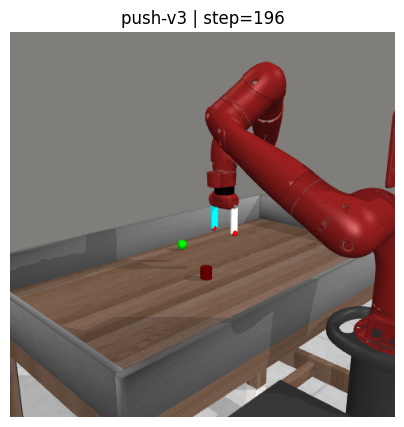

Demo finalizada


In [ ]:
env_name = 'push-v3'

env = gym.make(
    'Meta-World/MT1',
    env_name=env_name,
    render_mode='rgb_array',
    disable_env_checker=True,
    camera_id=1,
)

obs, info = env.reset()
print('obs shape:', np.asarray(obs).shape, 'dtype:', np.asarray(obs).dtype)

for step in range(200):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)

    if step % 4 == 0:
        frame = env.render()
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(np.rot90(frame, k=2))
        ax.set_title(f'{env_name} | step={step}')
        ax.axis('off')
        display(fig)
        plt.close(fig)

    if terminated or truncated:
        obs, info = env.reset()

env.close()

In [ ]:
!python metaworld_crl_runner.py   --mode continual   --algo sac   --task-preset cw10   --steps-per-task 1000000   --eval-episodes 10   --health-freq 5000   --plot-freq 20000   --checkpoint-freq 50000   --save-best-checkpoints   --improvement-metric success   --log-dir ./logs/metaworld_cw



/bin/bash: línea 1: metaworld_crl_runner.py: orden no encontrada
